<a href="https://colab.research.google.com/github/metacogpe/colab/blob/master/Colaboratory_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML




## 1) 텍스트 마이닝

## 2) 군집분석 일반 

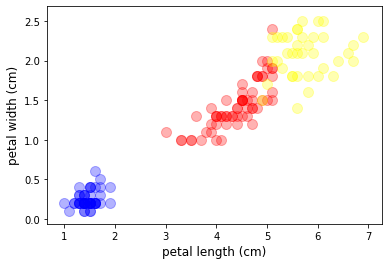

In [0]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import datasets
%matplotlib inline

# 데이터 로드
iris = datasets.load_iris()
data = iris['data']

# 학습 :클러스터 생성
model = cluster.KMeans(n_clusters=3)  # 임의의 갯수로 설정 
model.fit(data)

# 학습 결과의 라벨 취득 --> 질문 필요 
labels = model.labels_  # 모델학습을 하면 라벨을 취득할 수 있음 

# 그래프 그리기 
ldata = data[labels == 0]  # 취득된 라벨이 0인경우 
plt.scatter(ldata[:,2], ldata[:,3],
            c='red', alpha=0.3,s=100, marker="o")

ldata = data[labels == 1]  # 취득된 라벨이 1인경우
plt.scatter(ldata[:,2], ldata[:,3],
            c='blue', alpha=0.3,s=100, marker="o")

ldata = data[labels == 2]   # 취득된 라벨이 2인경우
plt.scatter(ldata[:,2], ldata[:,3],
            c='yellow', alpha=0.3,s=100, marker="o")

# 축 라벨의 설정(x,y의 2차원 그래프)
plt.xlabel(iris["feature_names"][2],fontsize='large')
plt.ylabel(iris["feature_names"][3],fontsize='large')

plt.show()



In [0]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [0]:
data, data.shape, type(data)

In [0]:
iris['target'] == model.labels_  # 아래의 예측과 타겟이 일치하는 경우가 거의 없음
                                 # 따라서, 군집과 iris타겟과는 관련이 없음 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,

In [0]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
iris['target']  # 군집분석은 우리가 사전에 정의한 타겟이 없어서 비지도학습

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 3) iris를 이용한 계층형 군집분석


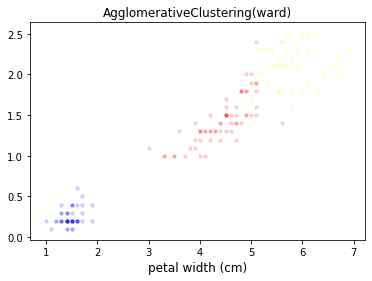

In [0]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import datasets

# 데이터 로딩
iris = datasets.load_iris()
data = iris["data"]
#계층형 클러스터 생성  --> 덴드로그램으로 표시, 군집간 거리를 ward방식으로 
model = cluster.AgglomerativeClustering(n_clusters=3, linkage="ward")
model.fit(data)

# 라벨 예측 : 훈련된 데이터로 부터 라벨이 도출 
labels = model.labels_

# 데이터 정의 
x_index = 2
y_index =3

data_x = data[:,x_index]
data_y = data[:,y_index]

x_label = iris["feature_names"][x_index]
y_label = iris["feature_names"][y_index]

# 시각화 : 산포도 그리기 
plt.scatter(data_x[labels==0], data_y[labels==0], c='red', alpha=0.15, s=10, marker="o")
plt.scatter(data_x[labels==1], data_y[labels==1], c='blue', alpha=0.15, s=10, marker="o")
plt.scatter(data_x[labels==2], data_y[labels==2], c='yellow', alpha=0.15, s=10, marker="o")

# 축 라벨과 타이틀 설정 
plt.xlabel(x_label, fontsize='large')
plt.xlabel(y_label, fontsize='large')
plt.title("AgglomerativeClustering(ward)", fontsize='large')
plt.show()

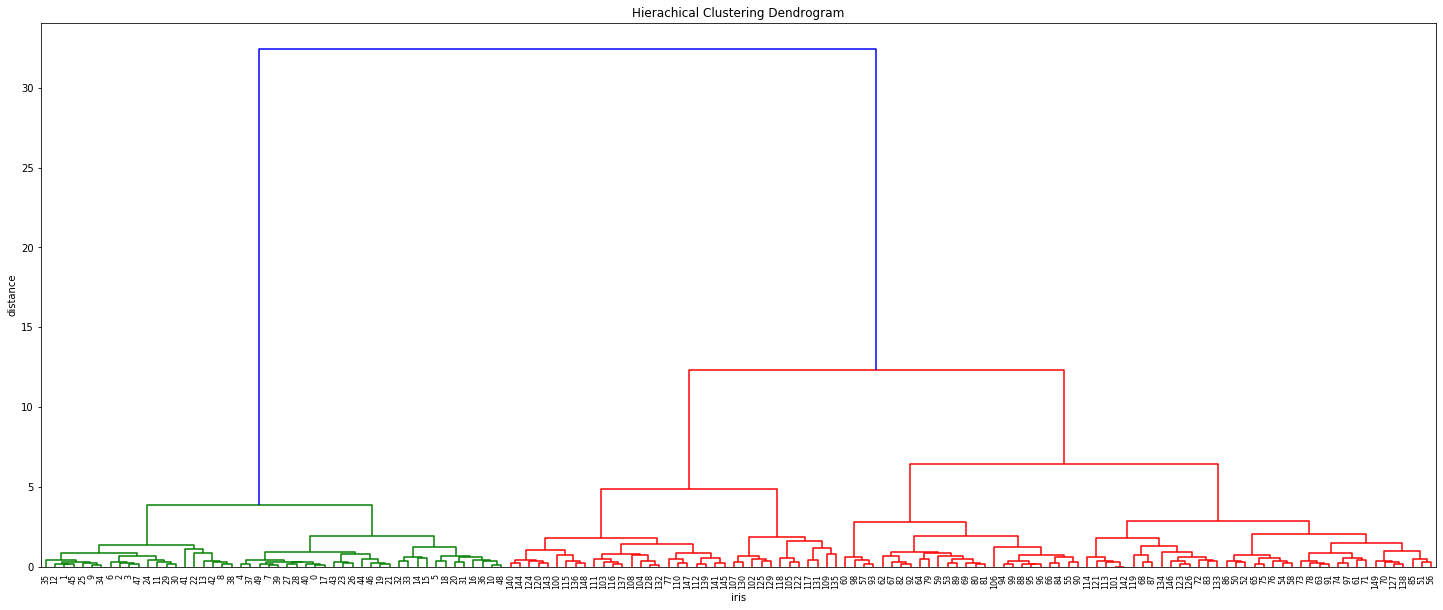

In [0]:
# 덴드로그램으로 그리기 : dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(data, 'ward')  # 연결정보에 대한 거리 대한 함수 정의 

plt.figure(figsize=(25,10))
plt.title('Hierachical Clustering Dendrogram')
plt.xlabel('iris')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90., # x축 라벨을 회전
    leaf_font_size=8.,  # x축 라벨 폰트 사이즈 
)
plt.show()

In [0]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## 4) 아카데미 데이터 이용한 군집분석
     닮은 학원생들끼리 군집 형성 

In [0]:

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster

academy = pd.read_csv('academy.csv')
academy.columns = ['num','kor','math','eng','sci','itn']
academy = academy.drop('num', axis=1)
academy.head()

academy_arr = np.array(accademy)
academy.columns, academy_arr, academy_arr.shape

model = cluster.KMeans(n_clusters=5)
model.fit(academy_arr)

labels = model.labels_  # 군집 정하기 
labels  # 정해진 군집 확인 
# 그래프 그리기 
ldata = academy_arr[labels == 0]
plt.scatter(ldata[:,2], ldata[:,3], c='red', alpha=0.3,s=100, marker="o")
ldata = academy_arr[labels == 1]
plt.scatter(ldata[:,2], ldata[:,3], c='blue', alpha=0.3,s=100, marker="o")
ldata = academy_arr[labels == 2]
plt.scatter(ldata[:,2], ldata[:,3], c='yellow', alpha=0.3,s=100, marker="o")
ldata = academy_arr[labels == 3]
plt.scatter(ldata[:,2], ldata[:,3], c='black', alpha=0.3,s=100, marker="o")
ldata = academy_arr[labels == 4]
plt.scatter(ldata[:,2], ldata[:,3], c='cyan', alpha=0.3,s=100, marker="o")

# 축라벨 설정 
plt.xlabel(academy.columns[2],fontsize='large')
plt.ylabel(academy.columns[3],fontsize='large')
plt.show()

In [0]:
# 덴드로그램 그리기 

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(academy_arr, 'ward')  # 덴드로그램에 사용하는 Z값

plt.figure(figsize=(25,10))
plt.title('hierarchical Clustering Dendrogram')
plt.xlabel('iris')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

## 5) ML 회귀분석

오차를 최소화
수학적으로 설명이 가능한 함수 모형을 찾기는 어려움 
가장 적합도가 높은 직선 구하기 
 - 오차 = 모델로 구현한 직선 - 실제값 
   (오차함수, 코스트 펑션, 에러 함수)
- 신뢰도 F, p-value 유의수준,   계수의 신뢰도인 T값 




In [0]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

# 데이터 읽어옴
h_stock = pd.read_csv('H_stock.csv')
s_stock = pd.read_csv('S_stock.csv')
k_stock = pd.read_csv('K_stock.csv')

# 헤더 정보 제거하고 전일 대비 rate 구하기 
h_rate = np.array(h_stock.h_rate[1:])
s_rate = np.array(s_stock.h_rate[1:])
k_rate = np.array(k_stock.h_rate[1:])

# 선형회귀모델함수에 넣기 위해 reshape로 차원 조정 
h_rate = h_rate.reshape(h_rate.shape[0],1)
s_rate = s_rate.reshape(s_rate.shape[0],1)
k_rate = k_rate.reshape(k_rate.shape[0],1)

plt.scatter(k_rate,h_rate, c='blank', s=30, marker='v',label='train')

model = linear_model_LinearRegression()
model.fit(k_rate, h_rate)  # 모델훈련 : k_rate가 독립변수, h_rate가 반응 변수

plt.plot(k_rate, model_predict(k_rate), linestyle='-',label='h_stock',c='red') #예측

print('기울기 : ', model.coef_)  # 절편 중요도보다는 기울기 중요(해당 %만큼 영향도) 금융에서는 베타지수로 표현
print('절편', model_intercept_)
print('결정계수 : ', model_score(k_rate, h_rate)) # 회귀모델의 설명력 계수


비선선회귀모델을 파이썬으로 나타내기 


In [0]:
from sklearn import linear_model 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#2차 회귀모형을 만들기 위한 가짜 데이터 random 생성(표준정규분포)
x_train = np.arrange(-10, +10, 1/50.).reshape(-1,1)
x_train.shape
x_train2 = x_train**2 + np.random.randn(len(x_train),1) *30

plt.scatter(x_train, x_train2, c='black', x=30, marker='x', label='sample')

#회귀 모형에 넣기 위한 트레이닝 데이터셋 만들기 
X2_TRAIN = np.c_[x_train**2, x_train]  # 2개를 합친값 concatenate

#모델 생성하고 훈련
model = linear_model.LinearRegression()
model.fit(X2_TRAIN, x_train2)  # 독립변수와 반응변수

#예측
plt.plot(x_train, model.predict(X2_TRAIN),linestyle='--',label='sample',c='red')

print(model.coef_)
print(model.intercept_)
print(model.score(X2_TRAIN, x_train2))

AttributeError: ignored

## 6) ML 의사결정트리



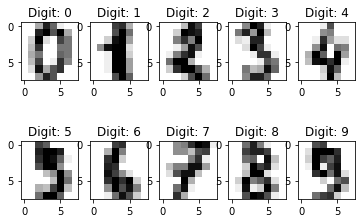

In [0]:
# 데이터 적재-->모델 만들기 --> 예측 --> 평가 

# _*_ coding: utf-8 _*_

import matplotlib.pyplot as plt
import random 
from sklearn import datasets, tree   # 모델 : 의사결정트리
from sklearn.metrics import accuracy_score, confusion_matrix   # 평가
from sklearn.metrics import precision_score, recall_score, f1_score

# 데이터 읽어오기 
digits = datasets.load_digits()

# 이미지를 표시함
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.imshow(img, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Digit: {0}'.format(label))
plt.show()

In [0]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [0]:
label, img, img.shape  # 9라는 라벨에 대한 이미지는 8곱하기8 어레이 수치로 표현 

(9, array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
        [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
        [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
        [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
        [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
        [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
        [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]]), (8, 8))

In [0]:
# 이미지를 넣어서 특정 라벨로 분류하는 알고리즘 임 
  # 이미지 데이터와 목표 데이터를 셋팅 
images = digits.images
labels = digits.target
# 차원을 하나 감소 : 함수에 넣기 위해서 차원을 줄여야 함 
images = images.reshape(images.shape[0], -1) # 8X8행렬이 64개 벡터로 만들어서 입력값으로 사용 

# 모델을 만드는 과정 : 의사결정트리를 생성
n_samples = len(images)  # 전체 데이터가 sample임 
train_size = int(n_samples * 2/3)  # 2/3 만 훈련데이터
classifier = tree.DecisionTreeClassifier(max_depth=3) #의사결정 트리 모델
classifier.fit(images[:train_size], labels[:train_size]) # 훈련 : train size까지

# 평가하기 : 의사결정트리의 성능 확인, 훈련데이터가 아닌 데이터로 예측
expected = labels[train_size:]  # 실제값은 expected에 저장 
predicted = classifier.predict(images[train_size:]) # 테스트 데이터를 넣어서 예측

print('Accuracy:\n',
      accuracy_score(expected, predicted))  # 간단히 볼 수 있는 지표
print('Confusion matrix:\n',
      confusion_matrix(expected, predicted)) # 혼돈행렬 : 실제(세로)와 예측값(가로))
                                            # 대각선에 모여 있어야 정확한 예측


Accuracy:
 0.44908180300500833
Confusion matrix:
 [[57  0  1  0  1  0  0  0  0  0]
 [ 0  0 25 16  6  0  0 15  0  0]
 [ 1  0 49  6  0  1  0  3  0  0]
 [ 0  0 10 46  0  0  0  5  0  1]
 [ 4  0 27  0 30  0  0  1  0  0]
 [ 0  0  2 29 20  5  0  3  0  0]
 [ 0  0 55  5  0  1  0  0  0  0]
 [ 0  0  0  0  6  0  0 55  0  0]
 [ 0  0 33  6  2  1  0 13  0  0]
 [ 2  0  1 21  7  0  0  0  0 27]]


In [0]:
expected

array([4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2,
       1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9,
       8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1,
       7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4,
       6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7,
       4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7,
       5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5,
       1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,

In [0]:
predicted

array([2, 2, 7, 7, 7, 2, 2, 0, 0, 2, 2, 7, 7, 2, 0, 7, 2, 2, 9, 3, 4, 3,
       3, 0, 2, 2, 2, 4, 3, 2, 7, 0, 3, 3, 2, 7, 2, 0, 0, 7, 7, 2, 3, 2,
       7, 4, 2, 2, 3, 7, 3, 9, 2, 7, 2, 7, 2, 3, 4, 4, 0, 7, 3, 2, 3, 2,
       4, 4, 5, 2, 4, 7, 2, 2, 2, 2, 5, 7, 3, 4, 2, 7, 2, 4, 9, 0, 7, 3,
       2, 0, 3, 2, 3, 2, 3, 2, 7, 2, 3, 0, 2, 3, 3, 0, 3, 2, 7, 2, 9, 0,
       3, 2, 3, 0, 3, 2, 7, 7, 9, 0, 9, 3, 3, 2, 4, 2, 3, 7, 3, 2, 2, 2,
       7, 7, 3, 3, 2, 0, 0, 2, 3, 7, 2, 3, 0, 3, 3, 2, 3, 3, 4, 2, 3, 0,
       2, 2, 2, 4, 9, 2, 3, 0, 9, 2, 2, 2, 3, 0, 0, 2, 7, 2, 3, 2, 2, 7,
       2, 2, 3, 7, 3, 2, 2, 7, 2, 7, 2, 3, 7, 4, 0, 4, 3, 5, 9, 2, 7, 7,
       4, 2, 2, 7, 3, 2, 2, 2, 3, 7, 3, 4, 2, 7, 4, 2, 0, 0, 7, 0, 3, 2,
       3, 4, 3, 3, 7, 2, 9, 0, 3, 2, 3, 4, 3, 3, 7, 2, 9, 0, 3, 2, 3, 4,
       3, 2, 7, 2, 9, 0, 9, 3, 3, 2, 3, 0, 9, 2, 9, 2, 2, 3, 7, 4, 3, 3,
       3, 0, 0, 2, 2, 7, 3, 2, 0, 3, 2, 3, 3, 3, 7, 3, 3, 4, 2, 2, 2, 4,
       9, 3, 3, 0, 9, 3, 2, 2, 2, 0, 0, 3, 7, 3, 3,

# Pandas
1. DataFrame : 행열 구조, 관계형 데이터 테이블
2. Series : 하나의 열


## 1) DataFrame



*   DataFrame으로 CSV 가져오기  





In [0]:
import pandas as pd
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2) Series



---


## Finace

Requirement already up-to-date: finance-datareader in /usr/local/lib/python3.6/dist-packages (0.9.1)


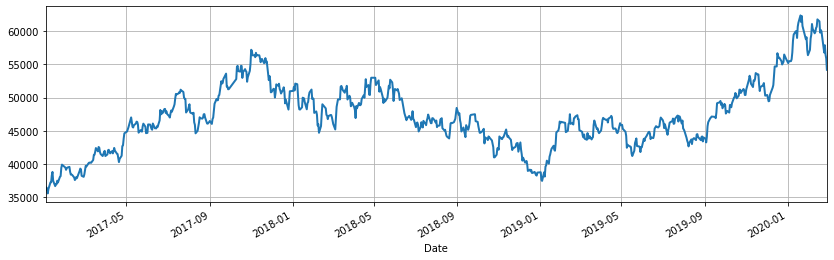

In [0]:
!pip install -U finance-datareader

#  차트 설정
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

import FinanceDataReader as fdr
fdr.__version__

# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()
len(df_krx)

# S&P 500 종목 전체
df_spx = fdr.StockListing('S&P500')
df_spx.head()

import FinanceDataReader as fdr

# 삼성전자, 2017년~현재

df = fdr.DataReader('005930', '2017')
df['Close'].plot()

## 나스닥 지수 : IXIC

findfont: Font family ['nanummyeongjo'] not found. Falling back to DejaVu Sans.


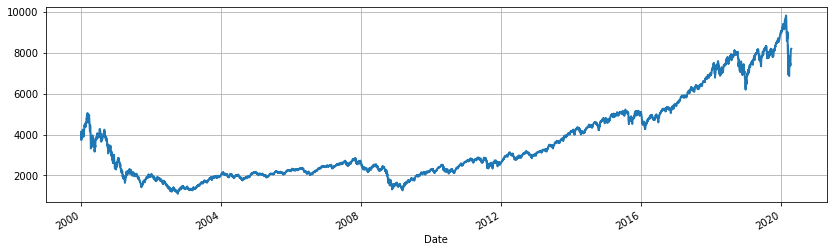

In [0]:
!pip install -U finance-datareader
#  차트 설정

import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

import FinanceDataReader as fdr

df = fdr.DataReader('IXIC', '2000')
df['Close'].plot()

## Pivot


In [0]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['SupermarketSales.csv'].decode('utf-8')))


Saving SupermarketSales.csv to SupermarketSales.csv


In [0]:
table = pd.pivot_table(df, index='제품군', columns='날짜', values='매출액', aggfunc='sum')
table

날짜,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,...,2019-02-19,2019-02-20,2019-02-21,2019-02-22,2019-02-23,2019-02-24,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-01,2019-03-02,2019-03-03,2019-03-04,2019-03-05,2019-03-06,2019-03-07,2019-03-08,2019-03-09,2019-03-10,2019-03-11,2019-03-12,2019-03-13,2019-03-14,2019-03-15,2019-03-16,2019-03-17,2019-03-18,2019-03-19,2019-03-20,2019-03-21,2019-03-22,2019-03-23,2019-03-24,2019-03-25,2019-03-26,2019-03-27,2019-03-28,2019-03-29,2019-03-30
제품군,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
스포츠/여행,"453,084384,590112,488182,334","44,169263,496278,490","97,115","144,831",NaN,"15,954268,696","70,845570,492","193,130151,320134,84626,540","992,58098,592","697,048160,013605,262","181,292342,492","415,835143,580","453,024331,821","36,202","584,814139,048","660,59032,220124,782193,814","373,98584,49080,184428,862","848,295555,732","279,800196,74684,167667,580","193,732344,988","102,055",NaN,"933,920","819,210144,018796,640","45,490166,608656,982","466,540268,010","167,700149,340","730,737673,672","119,496277,370145,23591,560","158,91223,275","222,300498,76278,853","506,107","428,648","515,457307,63276,929513,030134,067","223,910","34,300234,624",NaN,"47,40310,577","628,334431,310845,019337,845","231,300",...,"466,501","332,700","205,504","695,170254,700","425,082","361,608","66,23891,988475,330","56,628397,448","349,805",NaN,NaN,"276,52529,932567,320538,57382,09852,644",NaN,"89,838","604,674725,300","164,420574,890350,635349,317",NaN,NaN,"254,330935,622543,500126,610","325,62580,622","251,594215,558","716,352406,600","151,590","44,564219,774912,411","302,016753,208","603,20077,969357,450","340,140799,970","172,950","928,890","457,810631,656362,421131,300","205,880","387,690735,736231,006446,730","161,200","128,80576,440","194,084","40,685","582,756",NaN,NaN,"292,873465,295"
식품/음료,"175,720880,150","259,956",NaN,NaN,"74,048","930,590212,890","370,82484,927","570,256775,840682,15575,846345,380",NaN,"472,590","233,44271,710302,640267,687",NaN,"150,57287,528","531,874518,390132,16488,223","90,690174,242","872,910492,336","844,580120,412136,552","164,656","359,256319,986281,880247,896",NaN,"170,57175,62871,739","150,070","160,160320,072614,826445,815",NaN,"459,470353,150","301,641416,260164,07069,326","563,100509,868","83,937","524,472","504,5551,024,610",NaN,"73,995545,874","113,980435,708548,87239,957","665,392210,705701,480141,855245,230","97,09670,481","400,79791,416294,966","413,588187,29054,517","449,180102,834565,340",NaN,"65,76922,443327,97833,114",...,"171,560923,454","171,102479,910414,960250,848180,150",NaN,"31,626","334,29637,326308,226305,636","219,896","50,554310,752261,456","214,623165,984","785,992196,040774,180","503,070","311,54455,869","276,724","184,456759,720","821,184310,584","151,383814,42056,409","451,941","207,564","90,00270,88891,675","518,855926,361","178,902132,64373,745","291,846","392,120400,694","333,354282,205","48,838806,620442,704",NaN,"821,808330,770","23,525",NaN,"173,348","89,96065,11595,274249,318","357,492","294,110","164,580461,010","318,051","246,042230,424","152,658","359,485163,302100,839165,44490,948","363,540120,432266,970207,128223,641",NaN,"603,368194,272"
컴퓨터 주변기기,"466,188131,498771,890","137,340",NaN,"75,057623,844","683,445",NaN,"323,316","208,956248,322","701,575","388,91057,324",NaN,"922,170761,776","433,160146,388","447,062419,706","569,835393,430581,050",NaN,NaN,"136,810","330,03637,254100,672233,500",NaN,NaN,NaN,"262,236412,21286,403","419,120552,405404,52087,856","245,511","376,306633,941","484,33076,190","201,176117,1

In [0]:
print(df['날짜'])


0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
995    2019-01-29
996    2019-03-02
997    2019-02-09
998    2019-02-22
999    2019-02-18
Name: 날짜, Length: 1000, dtype: object


In [0]:
df['월'] = df['날짜'].str.slice(5,7)
df 

,거래번호,지점,고객타입,성별,제품군,단가,수량,매출액,날짜,시간,지불방식,매출원가,매출이익,월
0,750-67-8428,A,회원,여성,헬스/뷰티,"77,678",7,"543,746",2019-01-05,13:08,신용카드,"522,830","20,916",01
1,226-31-3081,C,비회원,여성,컴퓨터 주변기기,"15,891",5,"79,455",2019-03-08,10:29,현금,"76,400","3,055",03
2,631-41-3108,A,비회원,남성,홈데코,"48,183",7,"337,281",2019-03-03,13:23,신용카드,"324,310","12,971",03
3,123-19-1176,A,회원,남성,헬스/뷰티,"60,549",8,"484,392",2019-01-27,20:33,신용카드,"465,760","18,632",01
4,373-73-7910,A,비회원,남성,스포츠/여행,"89,762",7,"628,334",2019-02-08,10:37,신용카드,"604,170","24,164",02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,비회원,남성,헬스/뷰티,"41,964",1,"41,964",2019-01-29,13:46,신용카드,"40,350","1,614",01
996,303-96-2227,B,비회원,여성,홈데코,"101,275",10,"1,012,750",2019-03-02,17:16,신용카드,"973,800","38,950",03
997,727-02-1313,A,회원,남성,식품/음료,"33,114",1,"33,114",2019-02-09,13:22,현금,"31,840","1,274",02
998,347-56-2442,A,비회원,남성,홈데코,"68,453",1,"68,453",2019-02-22,15:33,현금,"65,820","2,633",02


In [0]:
print(df.dtypes)

거래번호    object
지점      object
고객타입    object
성별      object
제품군     object
단가      object
수량       int64
매출액     object
날짜      object
시간      object
지불방식    object
매출원가    object
매출이익    object
월       object
dtype: object


In [0]:
pd.to_numeric(df['매출액'])

ValueError: ignored

In [0]:
table = pd.pivot_table(df, index='제품군', columns='월', values='매출액', aggfunc='sum')
table

월,01,02,03
제품군,,,
스포츠/여행,"584,814453,084730,737697,04870,845819,21044,16...","628,334431,31077,190515,45734,300845,019144,93...","276,525325,625164,420254,330604,674387,690935,..."
식품/음료,"170,571459,470930,590301,641160,160570,256359,...","171,102449,180413,588187,290665,392231,870334,...","821,184151,383814,420359,485164,580363,540318,..."
컴퓨터 주변기기,"569,835433,160922,170136,81075,057330,036447,0...","429,564244,140447,410179,710118,122715,35277,6...","79,455621,642106,120390,872191,004473,676101,0..."
패션/액세서리,"16,047609,084459,018187,290170,85053,414296,99...","60,23634,861489,475646,050530,278281,487313,46...","182,354859,35074,340397,90550,658735,22884,303..."
헬스/뷰티,"543,746484,39275,420105,975618,948941,200364,0...","530,622745,472315,08069,61819,063480,42093,340...","742,350501,809274,497232,974200,886456,93631,9..."
홈데코,"90,189752,440698,913197,100543,537111,156486,4...","765,020116,708347,754756,198214,782193,31677,0...","337,28183,82469,056437,552250,60033,61292,2285..."


# 크롤링


## bs4 기반


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import requests
from bs4 import BeautifulSoup

# URL을 읽어서 HTML를 받아오고,
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36'}
data = requests.get('https://finance.naver.com/item/main.nhn?code=005930',headers=headers)

# HTML을 BeautifulSoup이라는 라이브러리를 활용해 검색하기 용이한 상태로 만듦
soup = BeautifulSoup(data.text, 'html.parser')

크롬 드라이버 
   https://chromedriver.chromium.org/downloads

In [0]:
import tensorflow as tf

# Numpy

In [0]:
import numpy as np

In [0]:
arr = np.array([[1,2,3,],[1,2,3]], dtype = np.int)
arr.dtype

dtype('int64')

In [0]:
arr.shape

(2, 3)

In [0]:
arr = arr.reshape([1,6])
arr.shape

(1, 6)

In [0]:
arr.reshape(-1)

array([1, 2, 3, 1, 2, 3])

In [0]:
arr = arr.reshape(-1,3)
arr.shape

(2, 3)

In [0]:
arr = np.random.randn(8,8)
arr.shape

(8, 8)

In [0]:
arr = arr.reshape(-1,2,1)
arr.shape

(32, 2, 1)

Ravel : 1차원으로 펼치기 

In [0]:
arr.shape

(32, 2, 1)

In [0]:
arr = arr.ravel()
arr.shape

(64,)

np.expand_dims()


In [0]:
arr.shape

(64,)

In [0]:
arr = np.expand_dims(arr,0)
arr.shape

(1, 64)

In [0]:
arr = arr.ravel()
arr.shape
arr = np.expand_dims(arr,-1)
arr.shape

(64, 1)

Zeros & Ones


In [0]:
zeros = np.zeros([3,3])
zeros

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [0]:
ones = np.ones([10,5])
ones

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [0]:
ones *5 

array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.]])

In [0]:
arr = np.arange(5)
arr

array([0, 1, 2, 3, 4])

In [0]:
arr = np.arange(4,9)
arr

array([4, 5, 6, 7, 8])

In [0]:
arr = np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Index


In [0]:
nums = [1,2,3,4,5]
nums[2:]

[3, 4, 5]

In [0]:
nums = [1,2,3,4,[1,2,3]]
nums[4]

[1, 2, 3]

In [0]:
arr[1][2]


5

Slicing


In [0]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [0]:
arr[1:]

array([[3, 4, 5],
       [6, 7, 8]])

In [0]:
arr[1:,1:]

array([[4, 5],
       [7, 8]])

Boolean Indexing


In [0]:
data = np.random.randn(3,3)
data

array([[ 1.51831974, -0.24092282, -0.1469287 ],
       [-0.30419964,  0.42978757,  0.35602953],
       [-1.82160186,  1.23725901, -1.33083133]])

In [0]:
data <=0

array([[False,  True,  True],
       [ True, False, False],
       [ True, False,  True]])

In [0]:
data[data <=0 ]

array([-0.24092282, -0.1469287 , -0.30419964, -1.82160186, -1.33083133])

Broadcast


In [0]:
arr = np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [0]:
arr +3

array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [0]:
arr *3

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24]])

In [0]:
arr + np.array([1,2,3])

array([[ 1,  3,  5],
       [ 4,  6,  8],
       [ 7,  9, 11]])

Math Function


In [0]:
arr + 10

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [0]:
arr + arr 

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

In [0]:
np.add(arr,1)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [0]:
arr + 1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [0]:
np.multiply(arr,3)

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24]])

In [0]:
arr = np.random.randint(2, size=27).reshape(3,3,3)
arr_2 = np.random.randint(2, size = 9).reshape(3,3)

In [0]:
arr

array([[[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]],

       [[1, 0, 0],
        [0, 1, 0],
        [1, 1, 0]],

       [[1, 0, 1],
        [1, 1, 0],
        [0, 1, 1]]])

In [0]:
arr.shape

(3, 3, 3)

In [0]:
arr_2

array([[1, 1, 0],
       [1, 0, 1],
       [1, 0, 0]])

In [0]:
arr + arr_2

array([[[1, 1, 0],
        [1, 0, 1],
        [2, 1, 1]],

       [[2, 1, 0],
        [1, 1, 1],
        [2, 1, 0]],

       [[2, 1, 1],
        [2, 1, 1],
        [1, 1, 1]]])

In [0]:
np.sum(arr)

13

In [0]:
np.max(arr+arr_2)

2

In [0]:
np.sum(arr + arr_2,0)

array([[5, 3, 1],
       [4, 2, 3],
       [5, 3, 2]])

In [0]:
np.sum(arr + arr_2, axis = - 1)

array([[2, 2, 4],
       [3, 3, 3],
       [4, 4, 3]])

In [0]:
arr = np.array([1,6,3,7,2,9,0,2])
arr

array([1, 6, 3, 7, 2, 9, 0, 2])

In [0]:
np.argmax(arr)

5

In [0]:
np.argmin(arr)

6

In [0]:
np.unique(arr)

array([0, 1, 2, 3, 6, 7, 9])